In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary Libraries and Github Repo**

In [6]:
# Uncomment the below code if the notebook is run on Google Colab.
!git clone https://github.com/abirmondal/detect-abusive-comment.git

Cloning into 'detect-abusive-comment'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 101 (delta 31), reused 80 (delta 21), pack-reused 0
Receiving objects: 100% (101/101), 36.83 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [44]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
from sklearn.feature_extraction.text import TfidfVectorizer
os.chdir(utils_folder_path)
import pandas as pd
import model_report as mr
import dataset as ds
import pickle as pkl

**Loading Dataset**

In [75]:
train_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/train.csv'
df_train = pd.read_csv(train_file_loc)
test_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/test.csv'
df_test = pd.read_csv(test_file_loc)

X_test = df_test['text'].to_list()
Y_test = df_test['hate'].values
X_train = df_train['text'].to_list()
Y_train = df_train['hate'].values

ds.get_dataset_details()
print('\nTesting Set Dataset Structure :-')
ds.get_test_set()

Dataset Details:-
  Dataset Name: m_dataset_21_9
   Total Count: 90345
     Train Set: 63241 ( 70.0% )
      Test Set: 18069 ( 20.0% )
Validation Set:  9035 ( 10.0% )

Testing Set Dataset Structure :-


,text,hate
0,বাঙালি জীবনেও আগাইতে পারবে না এই ধরনের শো বাইর...,0
1,বাহ চমেৎকার সিলেট খুলনাকে হারাই দিলো,0
2,এই সালা কে গুলি করে মারা উচিত,1
3,ধুর তোর খেলার মাইরে বাপ আর খেলাই দেখবো না,0
4,ভচ মিথ্যা বলেন কেনো আপনি তো গাঁজা খাইছেন,1
...,...,...
18064,আল্লাহ এই যুগের মেয়েরা কি এখনো এত বোকা আছে না...,0
18065,অপেক্ষায় আছে বাংলাদেশের কোটি মানুষ কবে শুনতে ...,0
18066,হুই হাই হুই হাই করার সময় ভাবি এত্তগুলি বান্দর...,0
18067,সব মাদার চুদরা দারিয়ে দেকলো,1


**TF-IDF Vectorization**

In [49]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Loading Pre-Trained Support Vector Machine**

In [52]:
model_path_svm = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-svm.pkl'
loaded_svm = pkl.load(open(model_path_svm, 'rb'))

    Accuracy Score:  0.724666555979855
Weighted Precision:  0.7339018447615733
   Weighted Recall:  0.5503066684066292
          F1-Score:  0.6289805354612573

Classification Report :-
               precision    recall  f1-score   support

           0       0.72      0.85      0.78     10406
           1       0.73      0.55      0.63      7663

    accuracy                           0.72     18069
   macro avg       0.73      0.70      0.71     18069
weighted avg       0.73      0.72      0.72     18069



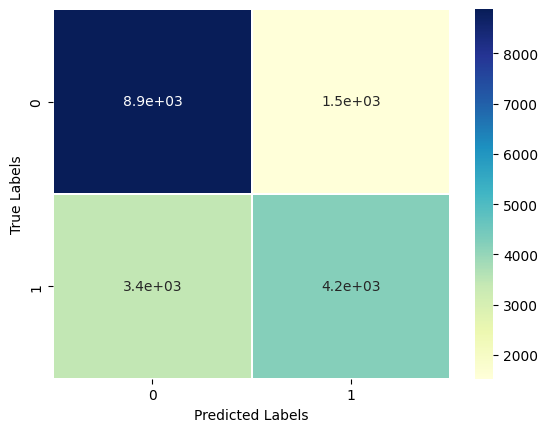

In [53]:
y_pred_svm = loaded_svm.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred_svm)
mr.model_eval(Y_test, y_pred_svm)

**Loading Pre-trained Logistic Regression**

In [55]:
model_path_lr = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-lr.pkl'
loaded_lr = pkl.load(open(model_path_lr, 'rb'))

    Accuracy Score:  0.7237257180806906
Weighted Precision:  0.7220282626766418
   Weighted Recall:  0.5667493148897299
          F1-Score:  0.6350343617487937

Classification Report :-
               precision    recall  f1-score   support

           0       0.72      0.84      0.78     10406
           1       0.72      0.57      0.64      7663

    accuracy                           0.72     18069
   macro avg       0.72      0.70      0.71     18069
weighted avg       0.72      0.72      0.72     18069



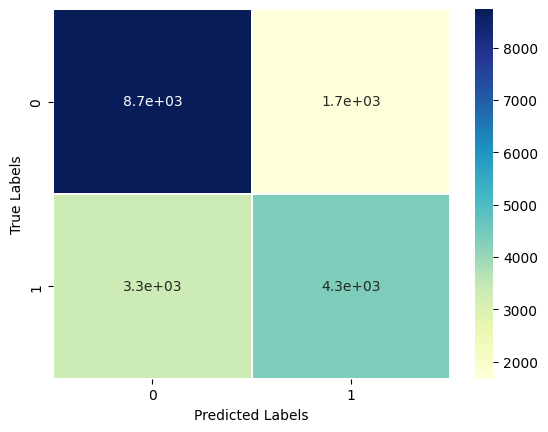

In [56]:
y_pred_lr = loaded_lr.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred_lr)
mr.model_eval(Y_test, y_pred_lr)


**Loading Pre-trained Multinomial Naive Bayes**

In [59]:
model_path_mnb = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-mnb.pkl'
loaded_nb = pkl.load(open(model_path_mnb, 'rb'))

    Accuracy Score:  0.716420388510709
Weighted Precision:  0.7486777668952008
   Weighted Recall:  0.4987602766540519
          F1-Score:  0.5986842105263158

Classification Report :-
               precision    recall  f1-score   support

           0       0.70      0.88      0.78     10406
           1       0.75      0.50      0.60      7663

    accuracy                           0.72     18069
   macro avg       0.73      0.69      0.69     18069
weighted avg       0.72      0.72      0.70     18069



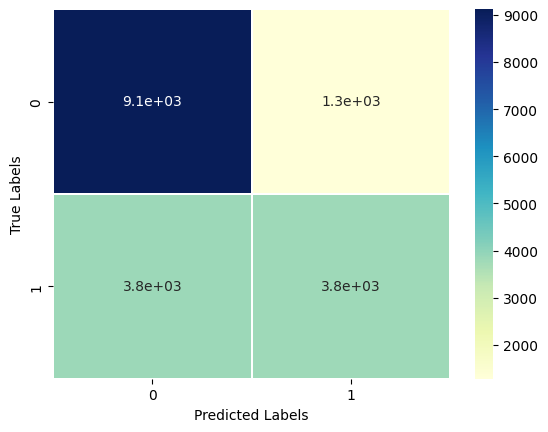

In [60]:
y_pred_nb = loaded_nb.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred_nb)
mr.model_eval(Y_test, y_pred_nb)


**Loading Pre-trained Random Forest**

In [61]:
model_path_rf = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-rf.pkl'
loaded_rf = pkl.load(open(model_path_rf, 'rb'))

    Accuracy Score:  0.7765233272455587
Weighted Precision:  0.7515614156835531
   Weighted Recall:  0.7066423071903954
          F1-Score:  0.7284100080710251

Classification Report :-
               precision    recall  f1-score   support

           0       0.79      0.83      0.81     10406
           1       0.75      0.71      0.73      7663

    accuracy                           0.78     18069
   macro avg       0.77      0.77      0.77     18069
weighted avg       0.78      0.78      0.78     18069



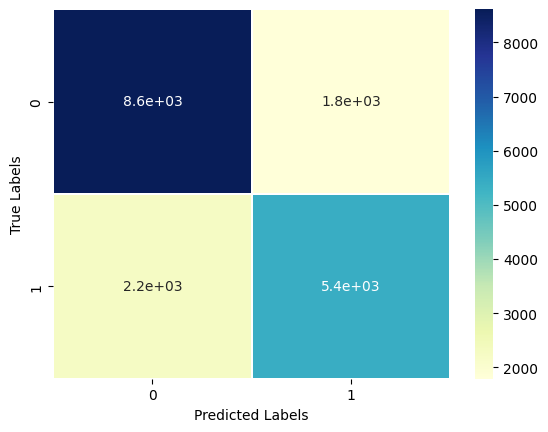

In [62]:
y_pred_rf = loaded_rf.predict(X_test_tfidf)
mr.confusion_mat(Y_test, y_pred_rf)
mr.model_eval(Y_test, y_pred_rf)